In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
diab_data = pd.read_csv(r"C:\Users\HP\Multiple Disease\diabetes.csv")


In [3]:
diab_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
diab_data.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [5]:
rows , cols = diab_data.shape

In [6]:
print('No. Of rows: ',rows)
print('No. Of cols: ',cols)

No. Of rows:  768
No. Of cols:  9


In [7]:
diab_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


## Preprocessing and Analysis
 

In [8]:
No , Yes = diab_data['Outcome'].value_counts()

In [9]:
print('People having Diabetes: ',Yes)
print('People Having no diabetes: ',No)

People having Diabetes:  268
People Having no diabetes:  500


In [10]:
diab_data.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [11]:
diab_data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [12]:
diab_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [13]:
diab_data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<h4>We might have 0 as considered null value so we need to check it and then remove it</h4>

In [14]:
diab_data_copy = diab_data.copy(deep=True)
diab_data_copy[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = diab_data_copy[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0, np.NaN)

# Showing the count of NaNs
print(diab_data_copy.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


In [15]:
diab_data_copy['Glucose'].fillna(diab_data_copy['Glucose'].mean(), inplace=True)
diab_data_copy['BloodPressure'].fillna(diab_data_copy['BloodPressure'].mean(), inplace=True)
diab_data_copy['SkinThickness'].fillna(diab_data_copy['SkinThickness'].median(), inplace=True)
diab_data_copy['Insulin'].fillna(diab_data_copy['Insulin'].median(), inplace=True)
diab_data_copy['BMI'].fillna(diab_data_copy['BMI'].mean(), inplace=True)

array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

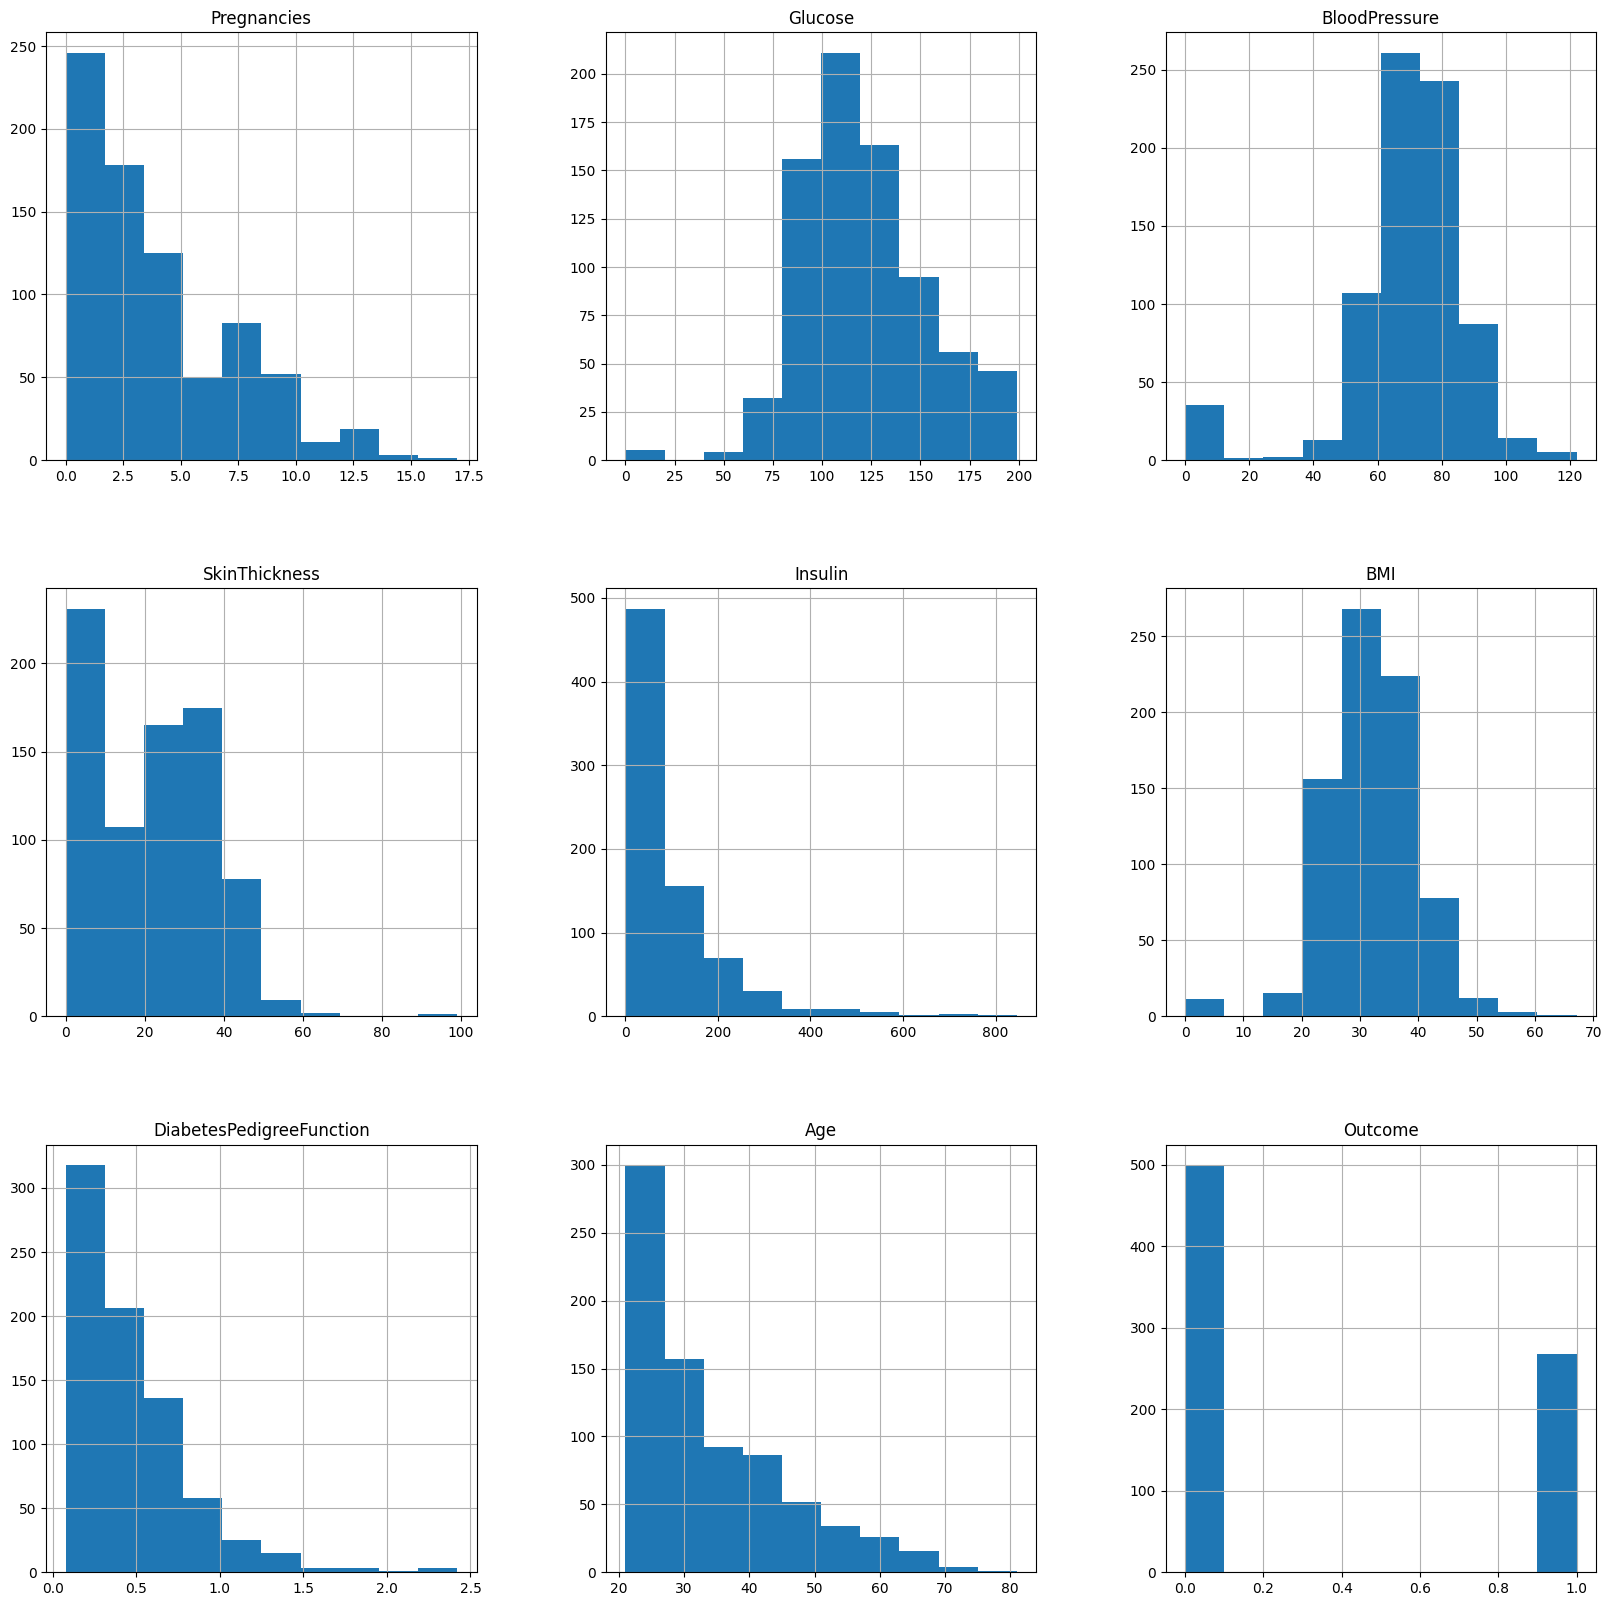

In [16]:
diab_data.hist(figsize=(20, 20))

In [17]:
diab_data = diab_data_copy

In [18]:
diab_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.108073,140.671875,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.435949,12.096346,8.791221,86.383060,6.875151,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.202592,29.000000,125.000000,32.400000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

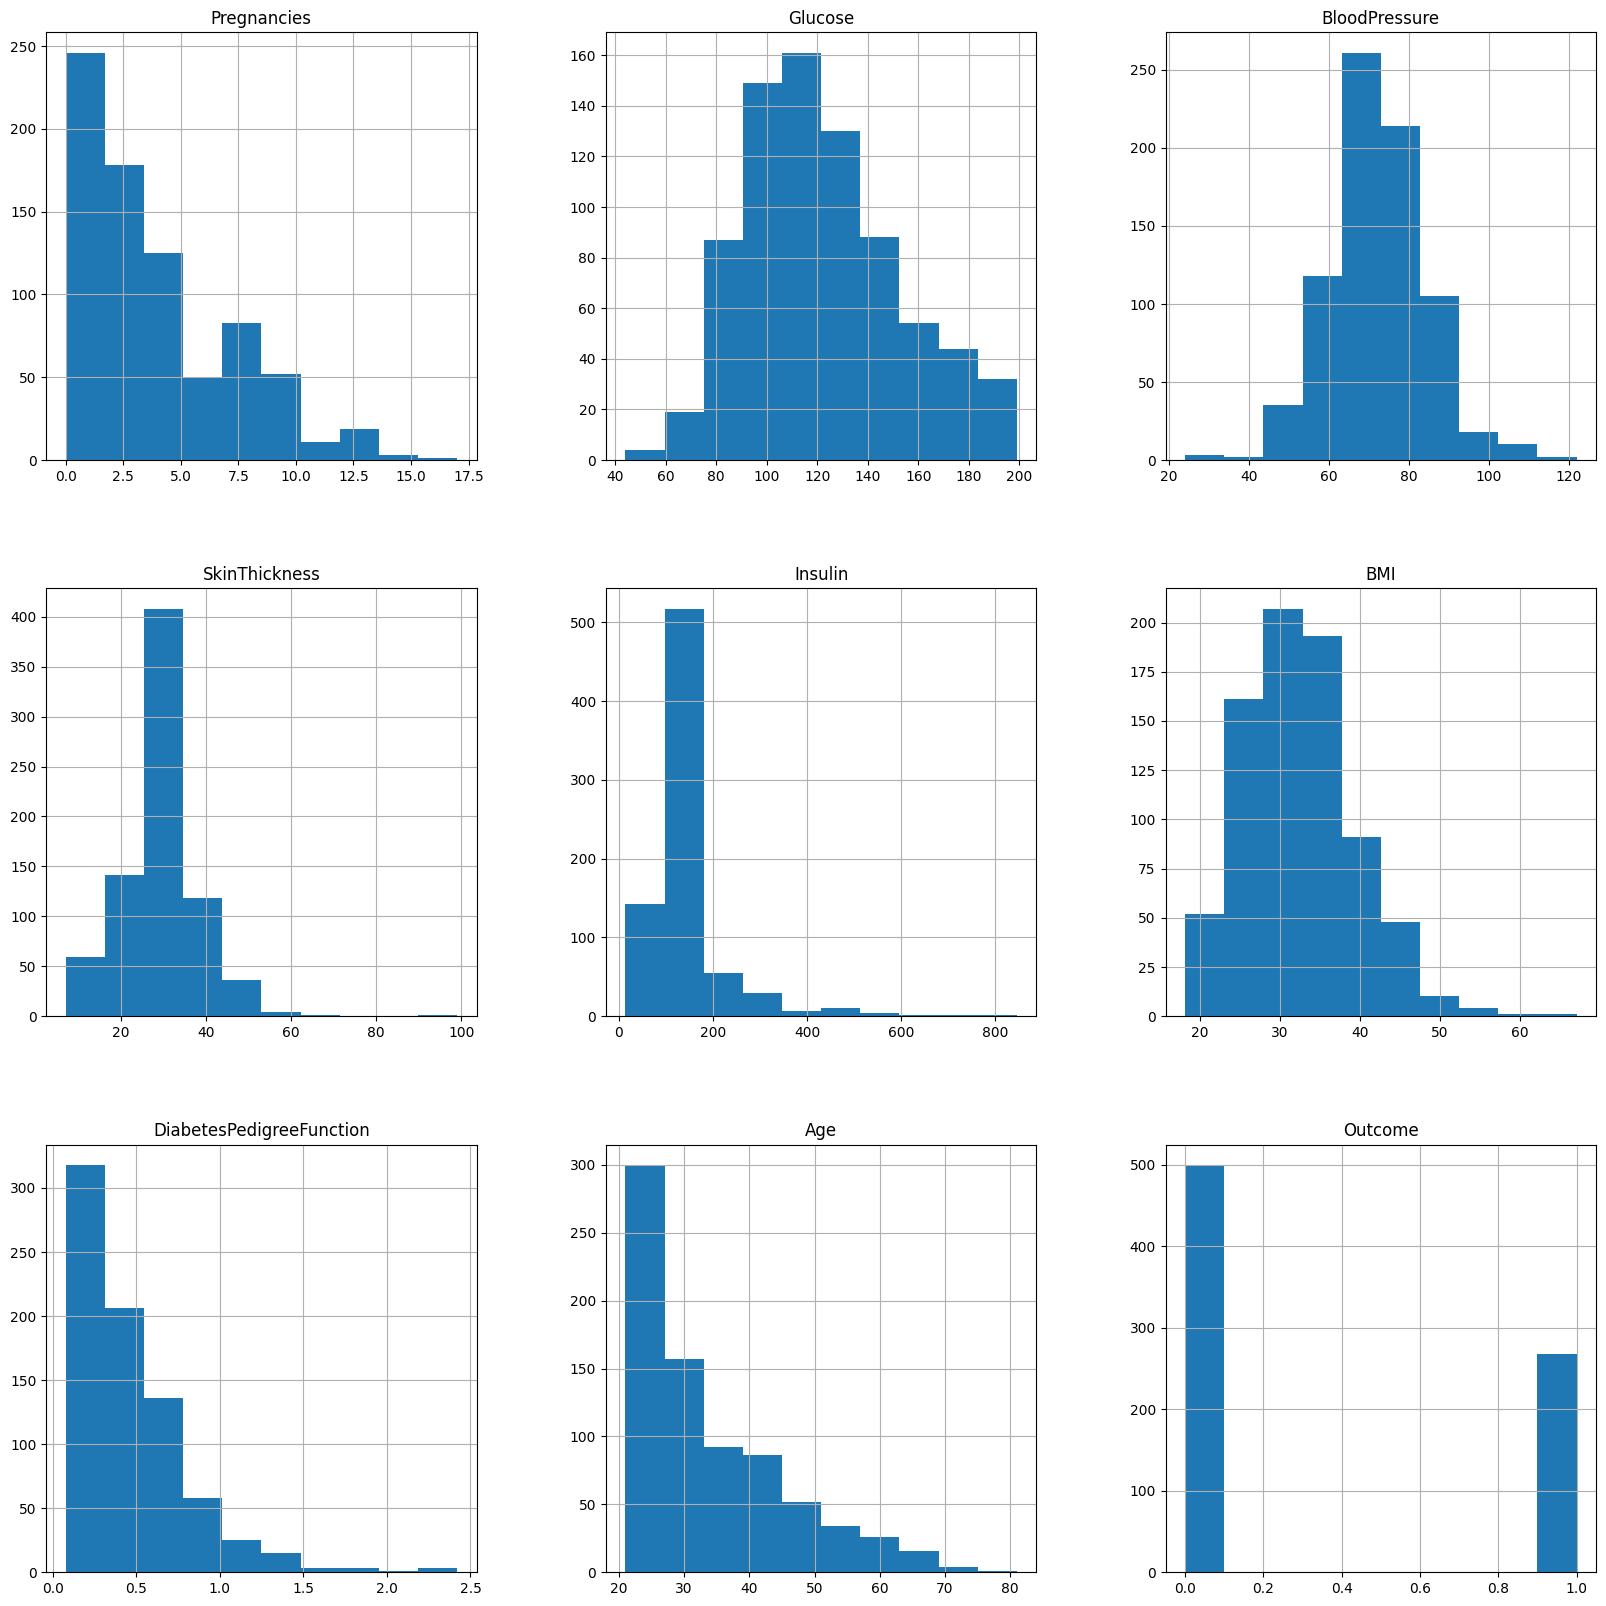

In [19]:
diab_data.hist(figsize=(20, 20))

## Null Value analysis

<Axes: >

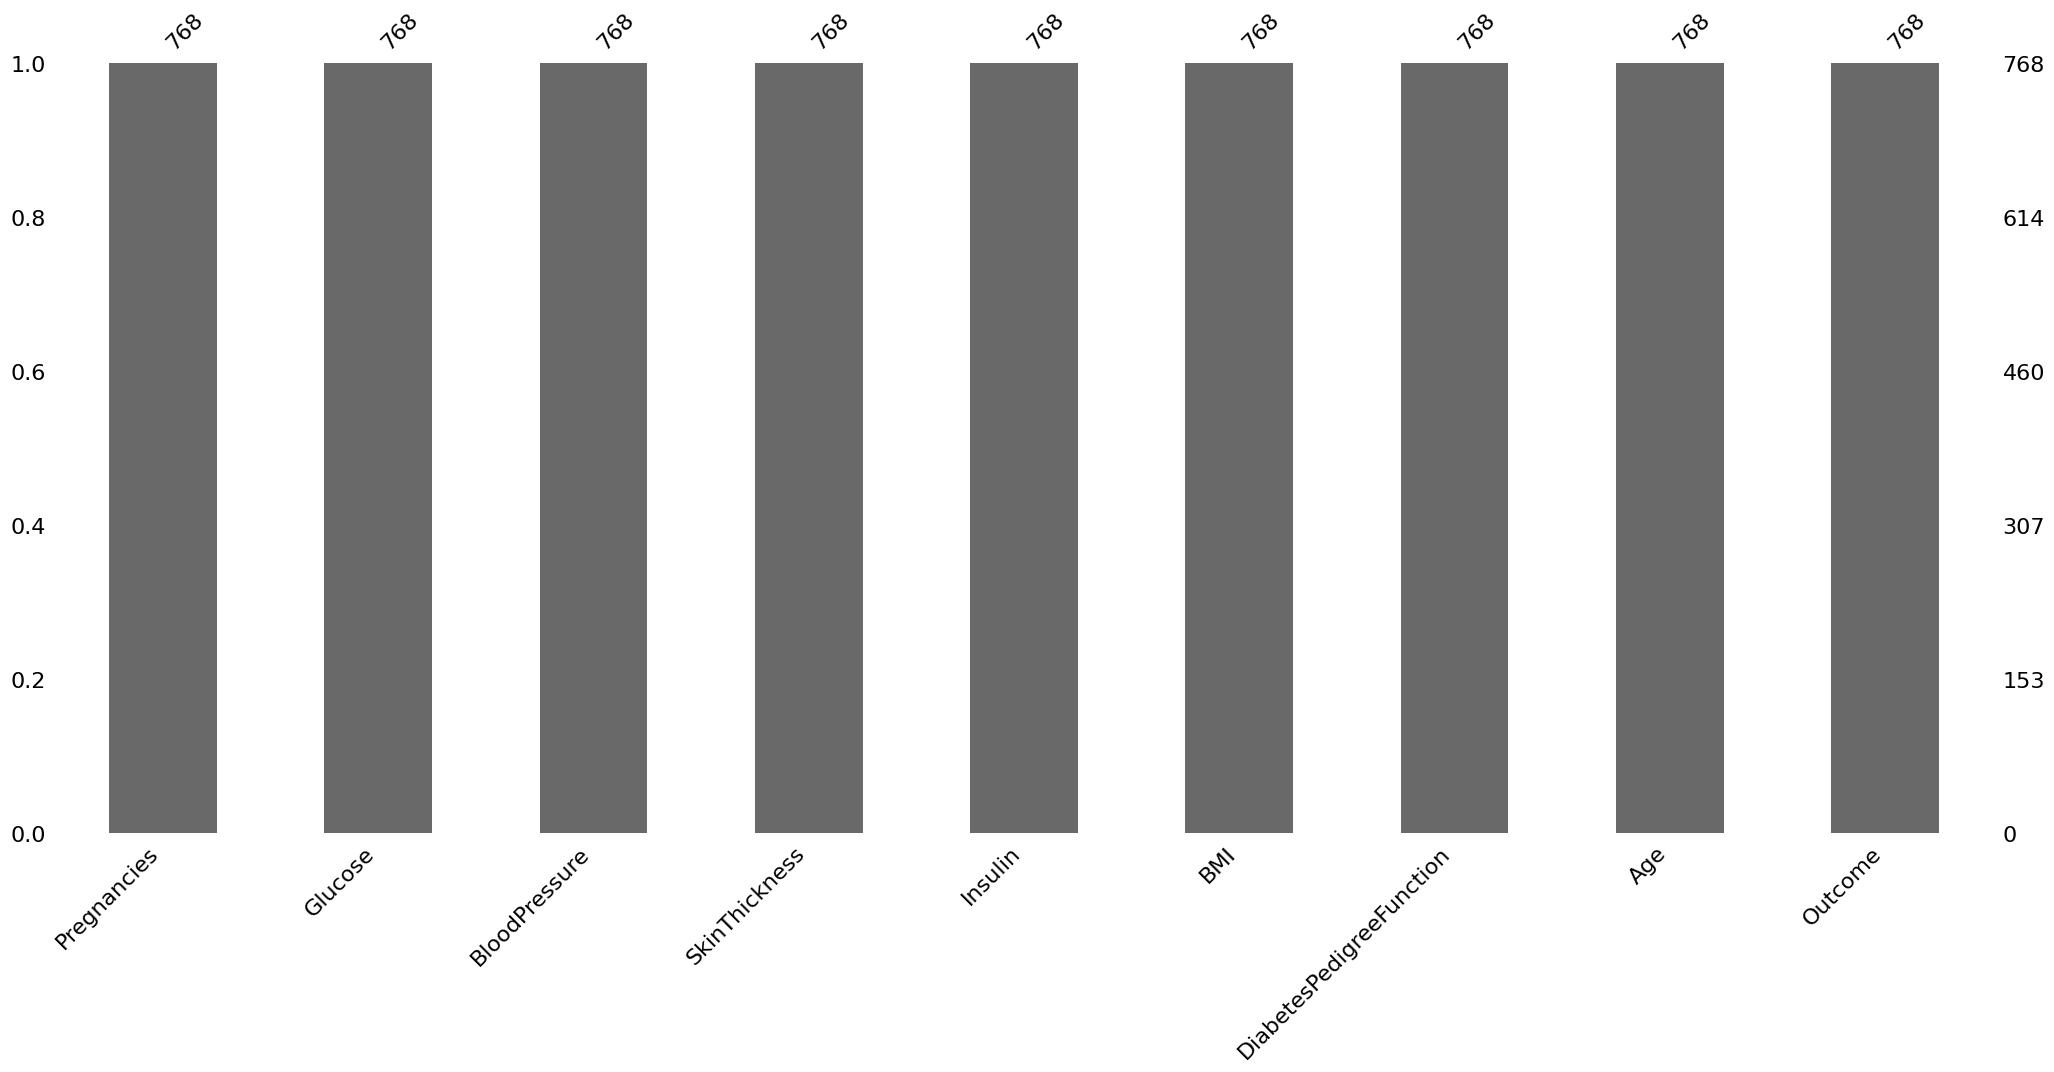

In [20]:
import missingno as msno
msno.bar(diab_data)

<Axes: xlabel='Outcome'>

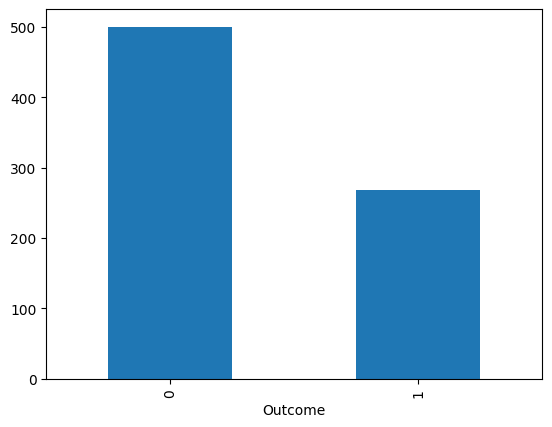

In [21]:
diab_data.Outcome.value_counts().plot(kind="bar")

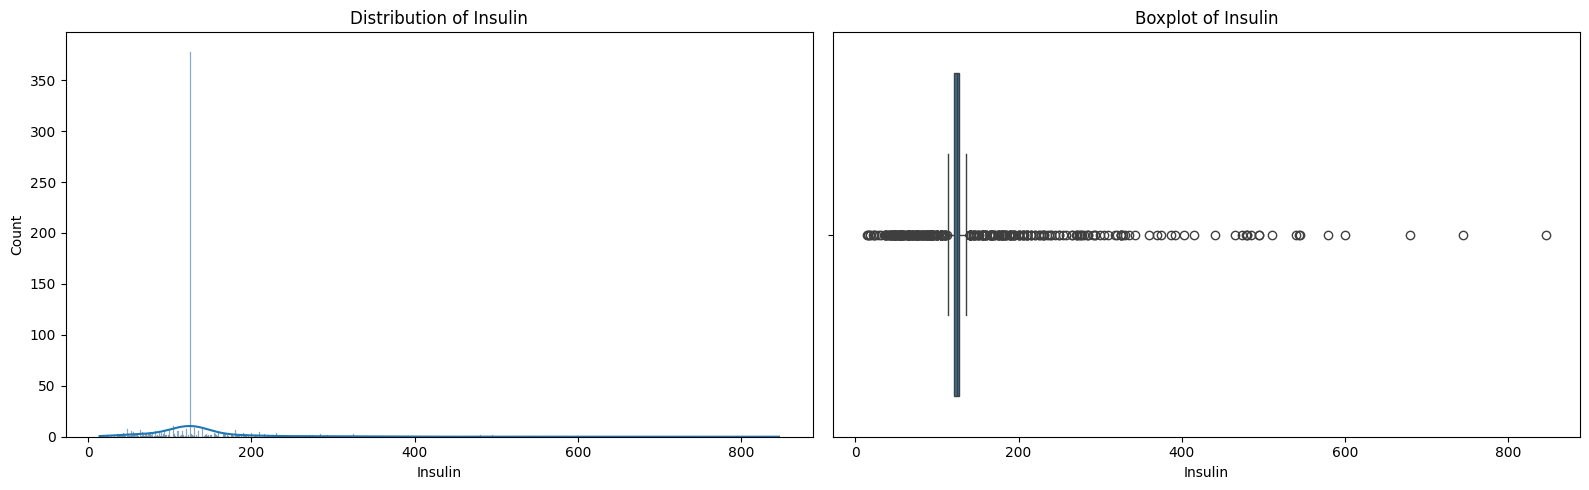

In [22]:
plt.figure(figsize=(16, 5))
plt.subplot(121)
sns.histplot(diab_data['Insulin'], kde=True)
plt.title('Distribution of Insulin')

# Plotting box plot
plt.subplot(122)
sns.boxplot(x=diab_data['Insulin'])
plt.title('Boxplot of Insulin')

plt.tight_layout()
plt.show()

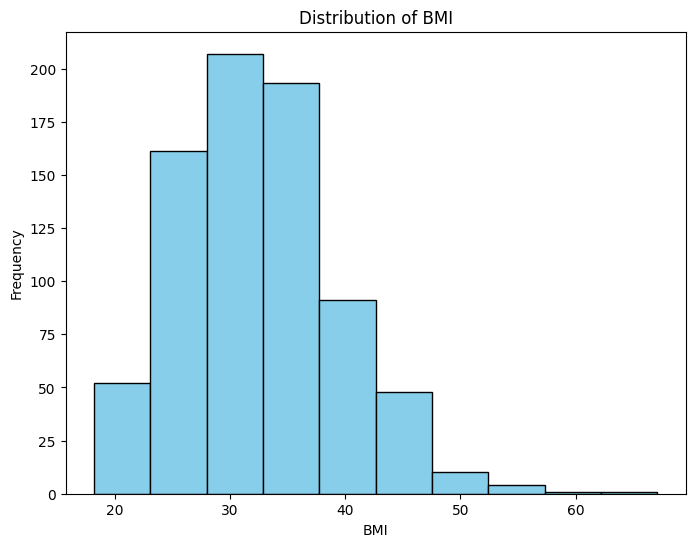

In [23]:
plt.figure(figsize=(8, 6))
plt.hist(diab_data['BMI'], bins=10, color='skyblue', edgecolor='black')
plt.title('Distribution of BMI')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()

In [24]:
bmi_outliers=diab_data[diab_data['BMI']>40]
print(bmi_outliers)
bmi_outliers['BMI'].shape

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
4              0    137.0           40.0           35.0    168.0  43.1   
16             0    118.0           84.0           47.0    230.0  45.8   
18             1    103.0           30.0           38.0     83.0  43.3   
41             7    133.0           84.0           29.0    125.0  40.2   
43             9    171.0          110.0           24.0    240.0  45.4   
..           ...      ...            ...            ...      ...   ...   
744           13    153.0           88.0           37.0    140.0  40.6   
746            1    147.0           94.0           41.0    125.0  49.3   
747            1     81.0           74.0           41.0     57.0  46.3   
753            0    181.0           88.0           44.0    510.0  43.3   
761            9    170.0           74.0           31.0    125.0  44.0   

     DiabetesPedigreeFunction  Age  Outcome  
4                       2.288   33        1  
16                 

(96,)

In [25]:
diab_data["BMI"] = diab_data["BMI"].apply(lambda x: diab_data.BMI.mean() if x>40 else x)

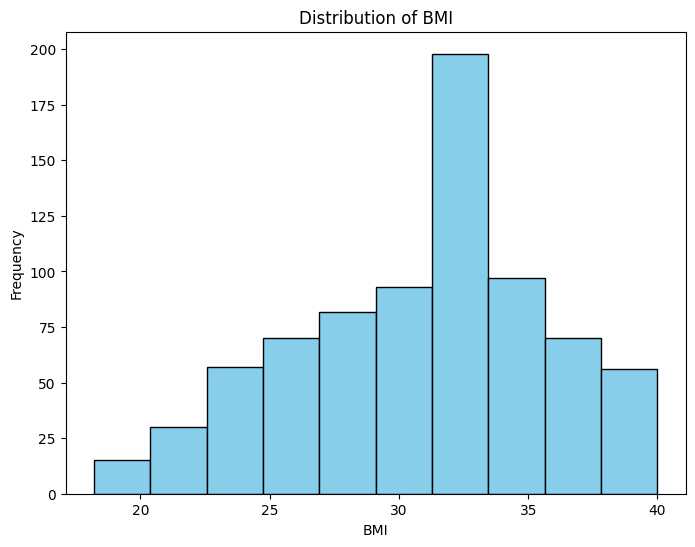

In [26]:
plt.figure(figsize=(8, 6))
plt.hist(diab_data['BMI'], bins=10, color='skyblue', edgecolor='black')
plt.title('Distribution of BMI')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()

In [27]:
diab_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.108073,140.671875,30.916209,0.471876,33.240885,0.348958
std,3.369578,30.435949,12.096346,8.791221,86.383060,4.843123,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.202592,29.000000,125.000000,32.400000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,34.125000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,40.000000,2.420000,81.000000,1.000000


<Axes: >

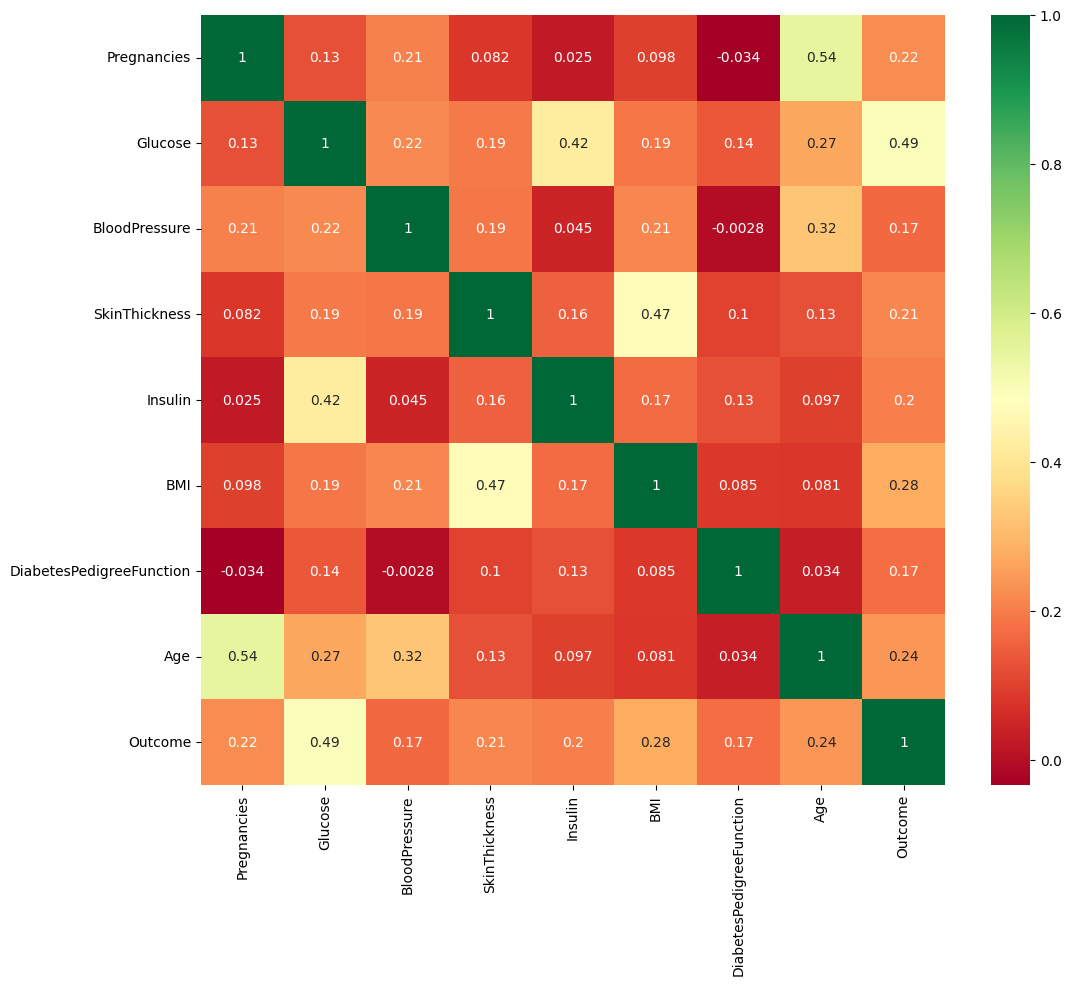

In [28]:
correlation_matrix = diab_data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='RdYlGn')

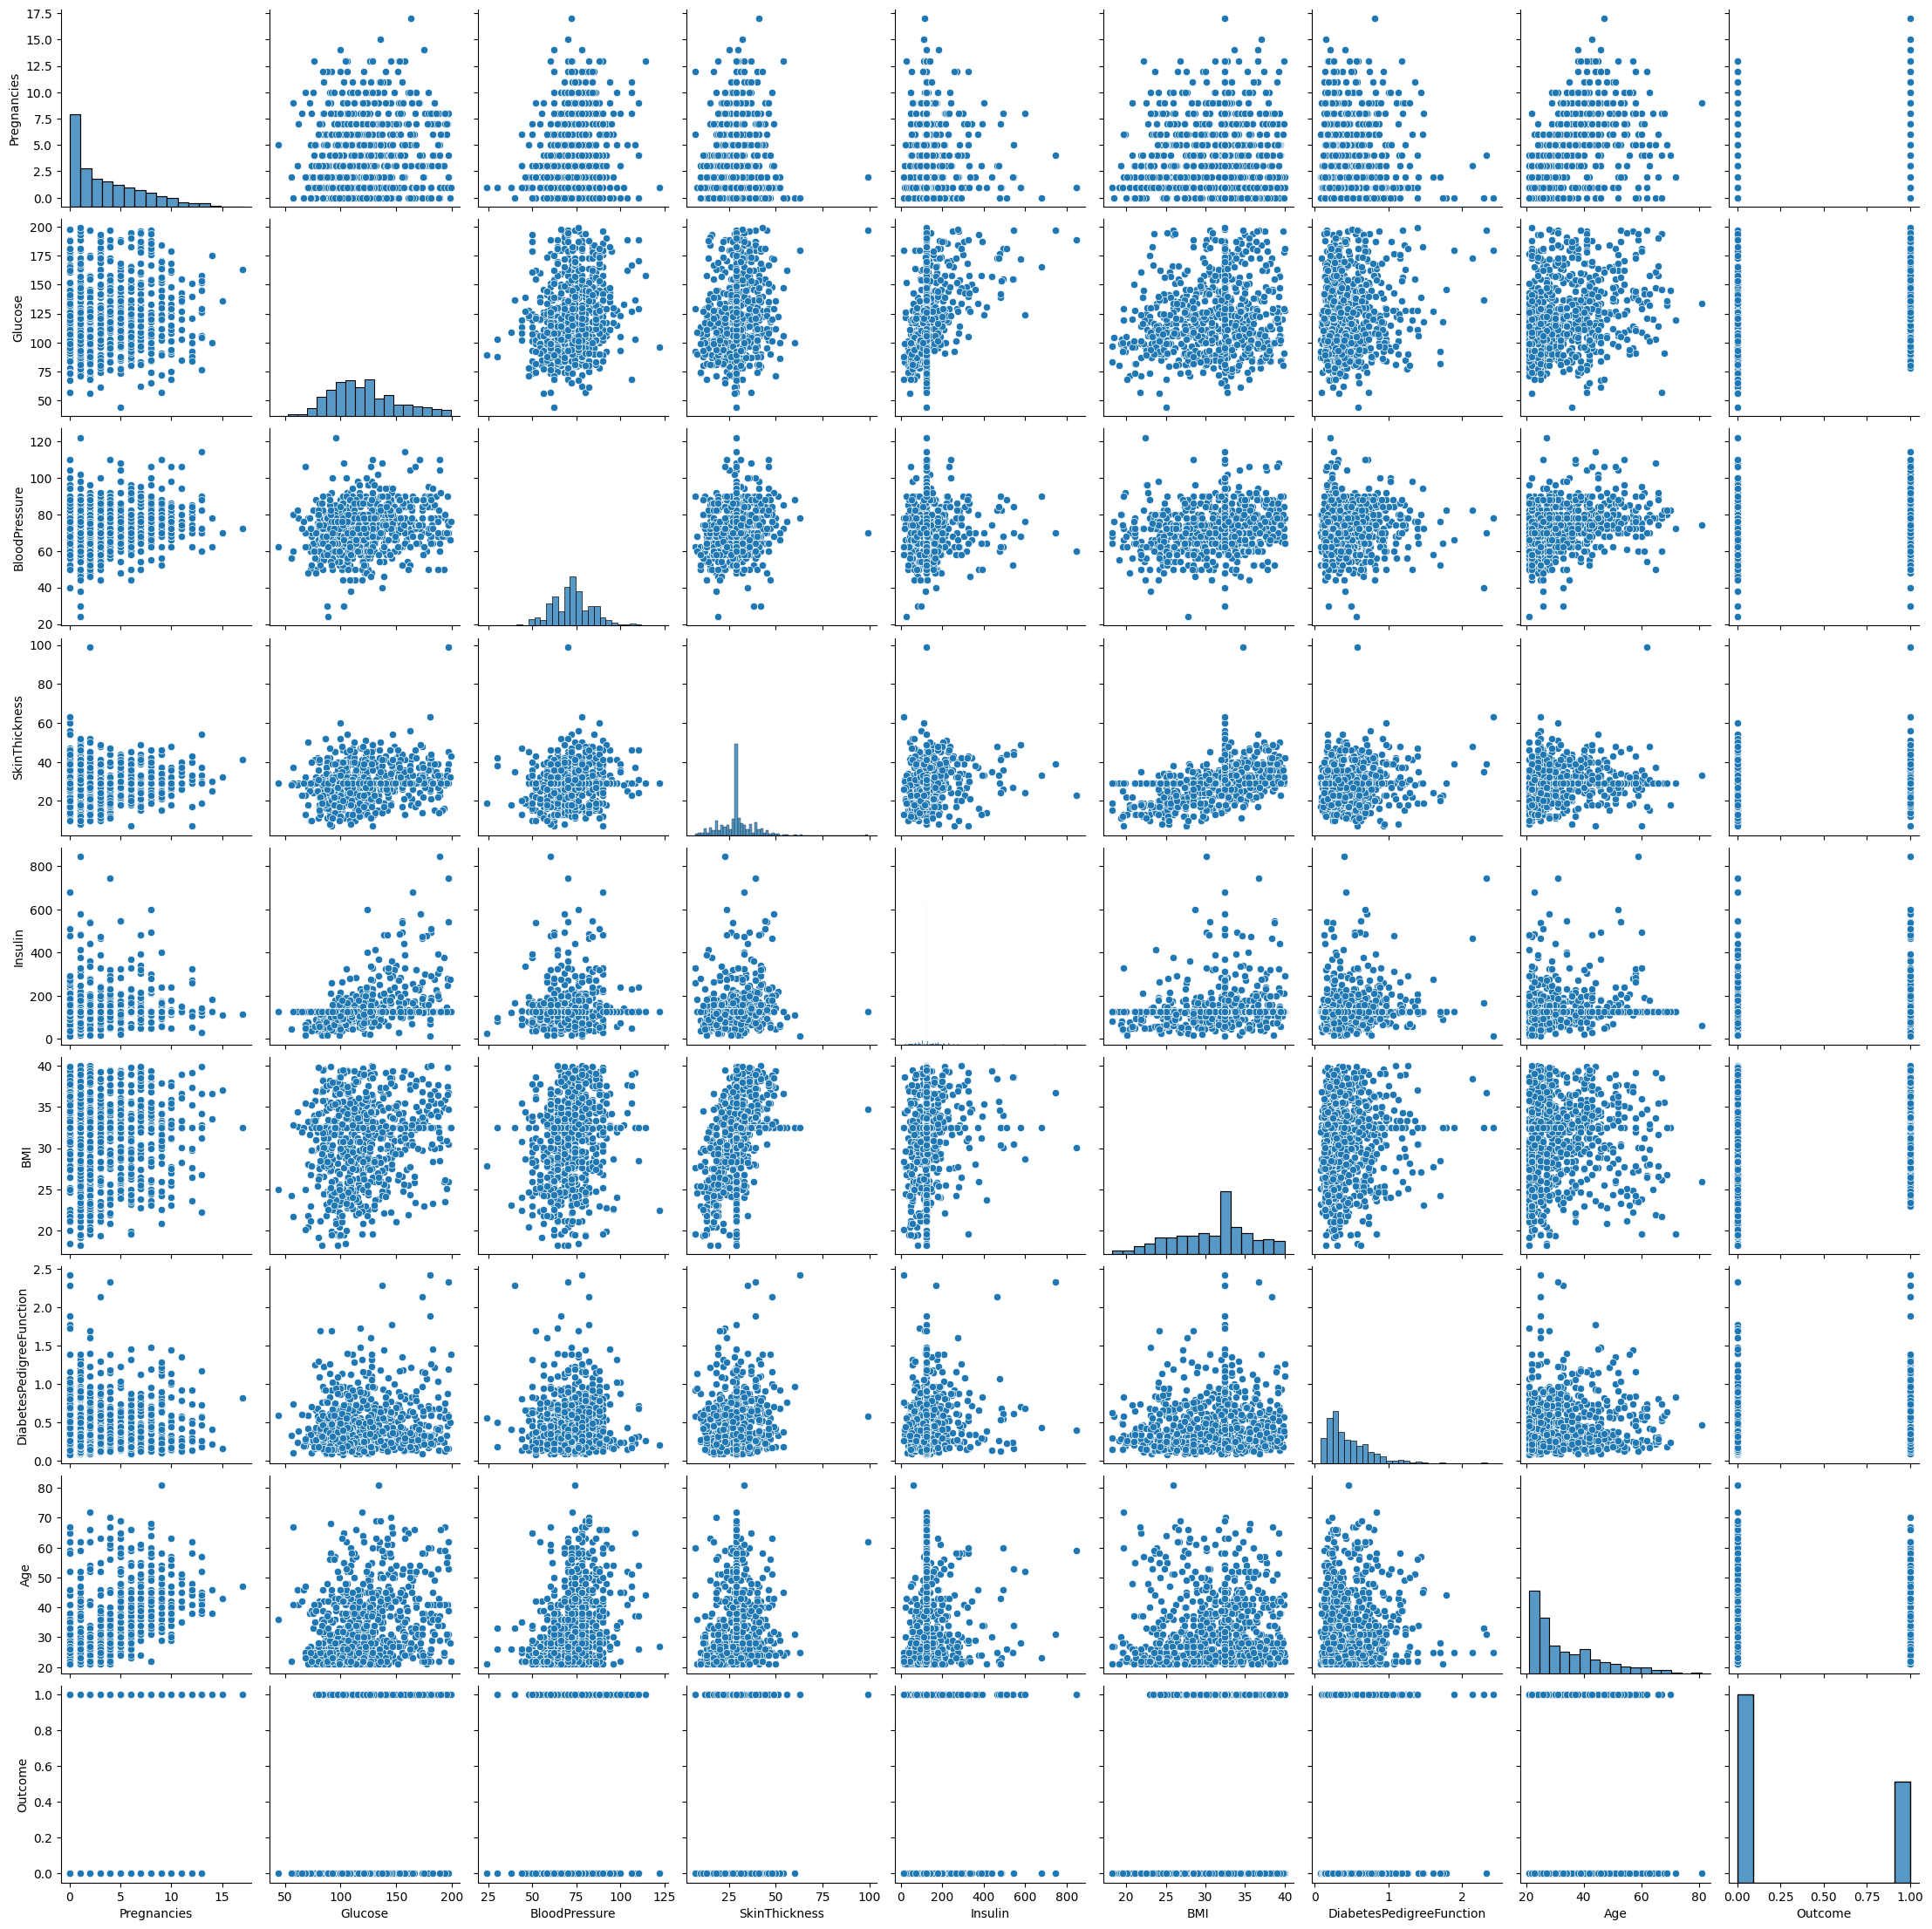

In [29]:
sns.pairplot(diab_data)
plt.show()

In [30]:
X = diab_data.drop(columns = ['Outcome'] , axis=1)
Y = diab_data['Outcome']

In [31]:
print(X)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin        BMI  \
0              6    148.0           72.0           35.0    125.0  33.600000   
1              1     85.0           66.0           29.0    125.0  26.600000   
2              8    183.0           64.0           29.0    125.0  23.300000   
3              1     89.0           66.0           23.0     94.0  28.100000   
4              0    137.0           40.0           35.0    168.0  32.457464   
..           ...      ...            ...            ...      ...        ...   
763           10    101.0           76.0           48.0    180.0  32.900000   
764            2    122.0           70.0           27.0    125.0  36.800000   
765            5    121.0           72.0           23.0    112.0  26.200000   
766            1    126.0           60.0           29.0    125.0  30.100000   
767            1     93.0           70.0           31.0    125.0  30.400000   

     DiabetesPedigreeFunction  Age  
0             

In [32]:
print(Y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


## Data Standardization And Balancing


In [33]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE


In [34]:
X_train , X_test , Y_train , Y_test = train_test_split(X,Y , test_size=0.33 , stratify=Y , random_state=2)

In [35]:
print(X.shape , X_train.shape , X_test.shape)

(768, 8) (514, 8) (254, 8)


In [36]:
smote = SMOTE(random_state=42)
X_train, Y_train = smote.fit_resample(X_train, Y_train)


In [37]:
scalar = StandardScaler()

In [38]:
X_train = pd.DataFrame(scalar.fit_transform(X_train), columns=X.columns)
X_test = pd.DataFrame(scalar.transform(X_test), columns=X.columns)

## MODEL BUILDING AND EVALUATION

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import  GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report



## Logistic Regression

In [40]:
model_log = LogisticRegression()

model_log.fit(X_train , Y_train)


LogisticRegression()

In [41]:
X_pred = model_log.predict(X_train)
training_accuracy = accuracy_score(X_pred , Y_train)

In [42]:
training_accuracy

0.7388059701492538

In [43]:
Y_prediction = model_log.predict(X_test)  
test_accuracy = accuracy_score(Y_test, Y_prediction)

In [44]:
test_accuracy

0.7559055118110236

In [45]:
conf_matrix = confusion_matrix(Y_test, Y_prediction)

In [46]:
print("Classification Report:")
print(classification_report(Y_test, Y_prediction))

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.81      0.81       165
           1       0.65      0.66      0.66        89

    accuracy                           0.76       254
   macro avg       0.73      0.73      0.73       254
weighted avg       0.76      0.76      0.76       254



In [47]:
from sklearn.metrics import precision_score,recall_score ,accuracy_score, f1_score, log_loss,roc_curve

chart = {
        'Metric':["Accuracy", "F1-Score", "Recall", "Precision", "Log-Loss"],
        'Logistic Regression':[accuracy_score(Y_test, Y_prediction), f1_score(Y_test, Y_prediction), recall_score(Y_test, Y_prediction), precision_score(Y_test, Y_prediction), log_loss(Y_test, Y_prediction)]
}
chart = pd.DataFrame(chart)

In [48]:
chart

,Metric,Logistic Regression
0,Accuracy,0.755906
1,F1-Score,0.655556
2,Recall,0.662921
3,Precision,0.648352
4,Log-Loss,8.798057


In [49]:
# Interpretation of confusion matrix
tn, fp, fn, tp = conf_matrix.ravel()
print("True Negatives:", tn)
print("False Positives:", fp)
print("False Negatives:", fn)
print("True Positives:", tp)


True Negatives: 133
False Positives: 32
False Negatives: 30
True Positives: 59


## SVM

In [50]:
model_svm = SVC(kernel='linear')

In [51]:
model_svm.fit(X_train , Y_train)

SVC(kernel='linear')

In [52]:
X_prediction = model_svm.predict(X_train)
trainingdata_acc = accuracy_score(X_prediction , Y_train)

In [53]:
trainingdata_acc

0.7626865671641792

In [54]:
Xtest_prediction = model_svm.predict(X_test)
testdata_acc = accuracy_score(Xtest_prediction , Y_test)

In [55]:
testdata_acc

0.7440944881889764

In [56]:
conf_matrix = confusion_matrix(Y_test, Xtest_prediction)

In [57]:
print("Classification Report:")
print(classification_report(Y_test, Xtest_prediction))

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.79      0.80       165
           1       0.63      0.65      0.64        89

    accuracy                           0.74       254
   macro avg       0.72      0.72      0.72       254
weighted avg       0.75      0.74      0.75       254



## Applying different ensemble models

In [58]:
RFC = RandomForestClassifier()
DTC = DecisionTreeClassifier()
BC = BaggingClassifier()
ADBC=AdaBoostClassifier()
GRBC=GradientBoostingClassifier()
XGBC=XGBClassifier()
model = [RFC,DTC,BC,ADBC,GRBC,XGBC]

In [59]:
for m in model:
    m.fit(X_train,Y_train)
    y_pred_train = m.predict(X_train)
    y_pred_test = m.predict(X_test)

    print(' Evaluation Metrics of ', m, ':')
    print('Train Accuracy Score:',accuracy_score(Y_train,y_pred_train))
    print('Test Accuracy Score:',accuracy_score(Y_test,y_pred_test))
    print('Precision Score :', precision_score(Y_test,y_pred_test))
    print('Recall Score:',recall_score(Y_test,y_pred_test))
    print('F1 Score:', f1_score(Y_test,y_pred_test))
    print('Log-Loss Score:', log_loss(Y_test,y_pred_test))
    print('==============================================================================================================')


 Evaluation Metrics of  RandomForestClassifier() :
Train Accuracy Score: 1.0
Test Accuracy Score: 0.7519685039370079
Precision Score : 0.6382978723404256
Recall Score: 0.6741573033707865
F1 Score: 0.6557377049180327
Log-Loss Score: 8.939961273678664
 Evaluation Metrics of  DecisionTreeClassifier() :
Train Accuracy Score: 1.0
Test Accuracy Score: 0.6811023622047244
Precision Score : 0.5425531914893617
Recall Score: 0.5730337078651685
F1 Score: 0.5573770491803278
Log-Loss Score: 11.494235923301138
 Evaluation Metrics of  BaggingClassifier() :
Train Accuracy Score: 0.9880597014925373
Test Accuracy Score: 0.7559055118110236
Precision Score : 0.6588235294117647
Recall Score: 0.6292134831460674
F1 Score: 0.6436781609195402
Log-Loss Score: 8.798057126477417
 Evaluation Metrics of  AdaBoostClassifier() :
Train Accuracy Score: 0.8432835820895522
Test Accuracy Score: 0.7322834645669292
Precision Score : 0.6179775280898876
Recall Score: 0.6179775280898876
F1 Score: 0.6179775280898876
Log-Loss Sco

## Observation
Based on the metrics, GradientBoostingClassifier seems to provide the best balance between performance and generalization:

<li>High Test Accuracy: 0.7716</li>
<li>Best Recall: 0.7416</li>
<li>Best F1 Score: 0.6881</li>
<li>Moderate Overfitting: Train accuracy is not perfect but reasonably high (0.9299)</li>
While RandomForestClassifier also performs well, it shows signs of overfitting, which may not generalize well to unseen data.

In [65]:
# Get feature importances
feature_importances = GRBC.feature_importances_

# Create a DataFrame to display feature importances
features = X_train.columns
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

# Sort the DataFrame by importance values to identify the most influential features
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the top 2-3 most important features
print("Top 2-3 most important features:")
print(feature_importance_df.head(3))


Top 2-3 most important features:
   Feature  Importance
1  Glucose    0.436154
5      BMI    0.137603
7      Age    0.130291


In [66]:
# These are the columns and based on this i take a test data:
# 'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
# 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'
input_data = (1, 130, 72, 2.5, 175, 30, 0.250, 25)

# Convert input_data to a NumPy array and reshape it
input_data_as_numpy_array = np.asarray(input_data)
newdata = input_data_as_numpy_array.reshape(1, -1)


stand_data = scalar.transform(newdata)


prediction =GRBC.predict(stand_data)
print(prediction)

# Assuming top_features is a DataFrame containing the top features
top_features = feature_importance_df['Feature'].head(3)

# Extract the corresponding values from the input_data array
top_feature_values = input_data_as_numpy_array[list(top_features.index)]

# Display the top 3 features and their values when the prediction is non-diabetic
if prediction == 0:
    print("Person is non-diabetic.")
    print("Top 3 features contributing to non-diabetic prediction:")
    for i in range(len(top_features)):
        feature = top_features.iloc[i]
        value = top_feature_values[i]
        print(f"{feature}: {value}")
else:
    print("Person is diabetic.")
    print("Top 3 features contributing to diabetic prediction:")
    for i in range(len(top_features)):
        feature = top_features.iloc[i]
        value = top_feature_values[i]
        print(f"{feature}: {value}")



[0]
Person is non-diabetic.
Top 3 features contributing to non-diabetic prediction:
Glucose: 130.0
BMI: 30.0
Age: 25.0


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


In [70]:
import pickle

# Save the trained model
model_filename = 'trained_model.sav'
pickle.dump(GRBC, open(model_filename, 'wb'))

# Save the scalar used for standardization
scalar_filename = 'scalar.sav'
pickle.dump(scalar, open(scalar_filename, 'wb'))




In [71]:
# Load the trained model
Diabetes_model = pickle.load(open('trained_model.sav', 'rb'))

# Load the scalar used for standardization
Diabetes_scalar = pickle.load(open('scalar.sav', 'rb'))




In [72]:
# These are the columns and based on this i take a test data:
# 'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
# 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'
input_data = (1, 130, 72, 2.5, 175, 30, 0.250, 25)

# Convert input_data to a NumPy array and reshape it
input_data_as_numpy_array = np.asarray(input_data)
newdata = input_data_as_numpy_array.reshape(1, -1)

# Use the loaded scalar to transform the input data
stand_data = Diabetes_scalar.transform(newdata)

# Use the loaded model to make predictions
prediction = Diabetes_model.predict(stand_data)
print(prediction)

# Assuming top_features is a DataFrame containing the top features
top_features = feature_importance_df['Feature'].head(3)

# Extract the corresponding values from the input_data array
top_feature_values = input_data_as_numpy_array[list(top_features.index)]

# Display the top 3 features and their values when the prediction is non-diabetic
if prediction == 0:
    print("Person is non-diabetic.")
    print("Top 3 features contributing to non-diabetic prediction:")
    for i in range(len(top_features)):
        feature = top_features.iloc[i]
        value = top_feature_values[i]
        print(f"{feature}: {value}")
else:
    print("Person is diabetic.")
    print("Top 3 features contributing to diabetic prediction:")
    for i in range(len(top_features)):
        feature = top_features.iloc[i]
        value = top_feature_values[i]
        print(f"{feature}: {value}")



[0]
Person is non-diabetic.
Top 3 features contributing to non-diabetic prediction:
Glucose: 130.0
BMI: 30.0
Age: 25.0


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
